In [2]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Widen jupyter notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Show all columns in the head command
pd.set_option('display.max_columns', None)

In [4]:
# Load data from the csv file into a DataFrame and save in a variable
df = pd.read_csv("amazon_prime_titles.csv")

In [5]:
#Print first 5 rows
df.head(len(df))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [7]:
df.shape

(9668, 12)

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Convert the `date` column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [10]:
# Informations on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7586 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 906.5+ KB


In [11]:
# Dealing with missing data
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

In [12]:
# Create a new df of just the rows that are missing data
df_null_geo = df[pd.isnull(df.rating)]
df_null_geo.head(len(df))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,2021-03-30,1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
...,...,...,...,...,...,...,...,...,...,...,...,...
6010,s6011,TV Show,Hook City,NaN,"Leighton Bryce Jennings, Jacobi Howard, Messia...",NaN,NaT,2021,NaN,1 Season,"Action, Drama","In the south, Grudge Racing is king. Racers pl..."
6152,s6153,Movie,Porky's,Bob Clark,"Kim Cattrall, Dan Monahan, Mark Herrier, Wyatt...",NaN,NaT,1982,NaN,98 min,"Comedy, Young Adult Audience",Students at a Florida high school during the 1...
6295,s6296,Movie,The Healing Garden,Joseph Granda,"Danny Mann, Kyriana Kratter, Redmond Ramos, Ja...",NaN,NaT,2021,NaN,96 min,"Drama, Special Interest",An aging military chaplain and a young girl fr...
6352,s6353,Movie,Manipulated,Matt Berman,"Traci Lords, Gail O'Grady, Chase Masterson, Mi...",NaN,NaT,2021,NaN,92 min,"Drama, Suspense",District Attorney Diane Conrad is under extrem...


In [ ]:
# Director has 2082 missing values
# Cast has 2133 missing values
# Country has 8996 missing values
# Date_added has 9513 missing values
# Rating has 337 missing values

In [13]:
df['release_year'].unique()

array([2014, 2018, 2017, 1989, 2016, 1994, 2020, 2019, 2008, 2001, 1941,
       1991, 2005, 2015, 2011, 2013, 1949, 2007, 2002, 1955, 1959, 1983,
       2009, 2012, 2010, 1986, 1988, 1920, 1936, 1992, 2021, 1993, 2006,
       1948, 1946, 1944, 1935, 1985, 1937, 1970, 1945, 1939, 1996, 1997,
       1974, 1938, 1978, 2004, 1943, 1975, 1960, 1934, 1940, 1961, 2003,
       2000, 1967, 1995, 1951, 1932, 1999, 1963, 1969, 1952, 1947, 1929,
       1990, 1925, 1968, 1987, 1942, 1979, 1980, 1981, 1976, 1966, 1973,
       1956, 1972, 1950, 1953, 1982, 1977, 1933, 1958, 1984, 1998, 1924,
       1922, 1926, 1954, 1930, 1971, 1965, 1931, 1923, 1962, 1964, 1957,
       1927], dtype=int64)

In [14]:
# Reasons for high standard deviation
df["release_year"].value_counts()

2021    1442
2020     962
2019     929
2018     623
2017     562
        ... 
1922       2
1926       2
1924       1
1923       1
1927       1
Name: release_year, Length: 100, dtype: int64

In [30]:
df['release_year'].value_counts(normalize=True)

2021    0.149152
2020    0.099504
2019    0.096090
2018    0.064439
2017    0.058130
          ...   
1922    0.000207
1926    0.000207
1924    0.000103
1923    0.000103
1927    0.000103
Name: release_year, Length: 100, dtype: float64

array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

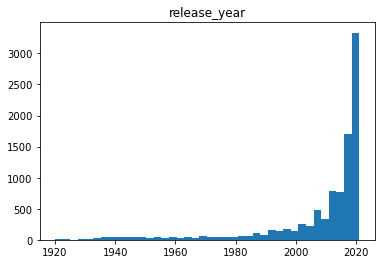

In [15]:
df.hist(['release_year'], bins=40, grid=False)

Text(0, 0.5, '')

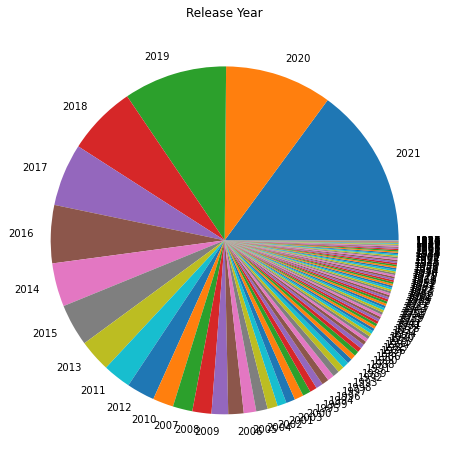

In [19]:
plt.figure(figsize=(12,8));

services = df['release_year'].value_counts()
services.plot(kind='pie')

plt.title('Release Year')
plt.ylabel("")

In [20]:
# Types of shows
df["type"].value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

In [21]:
# Reasons for high standard deviation
df["type"].value_counts(normalize=True)

Movie      0.808233
TV Show    0.191767
Name: type, dtype: float64

In [ ]:
# A little more than 80% of the shows are movies

Text(0, 0.5, '')

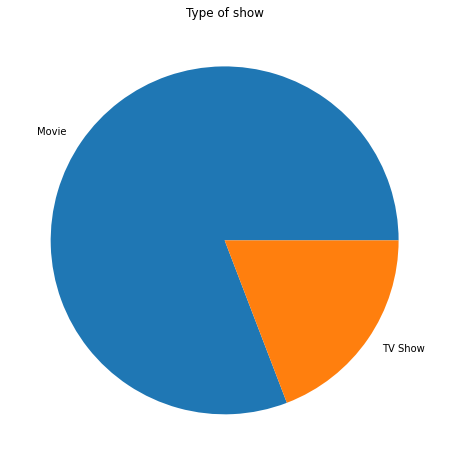

In [22]:
plt.figure(figsize=(12,8));

services = df['type'].value_counts(normalize=True)
services.plot(kind='pie')

plt.title('Type of show')
plt.ylabel("")

In [ ]:
# Analysis of the movies

In [49]:
# Filter using variable

value='Movie'
df2=df.query("type == @value")

In [51]:
df2 = df2[['show_id','type', 'title', 'release_year', 'country', 'duration']].copy()

In [52]:
df2.head(len(df))

,show_id,type,title,release_year,country,duration
0,s1,Movie,The Grand Seduction,2014,Canada,113
1,s2,Movie,Take Care Good Night,2018,India,110
2,s3,Movie,Secrets of Deception,2017,United States,74
3,s4,Movie,Pink: Staying True,2014,United States,69
4,s5,Movie,Monster Maker,1989,United Kingdom,45
...,...,...,...,...,...,...
9660,s9661,Movie,The Man in the Hat,2021,NaN,96
9662,s9663,Movie,River,2021,NaN,93
9663,s9664,Movie,Pride Of The Bowery,1940,NaN,60
9665,s9666,Movie,Outpost,2008,NaN,90


In [53]:
df2['type'].unique()

array(['Movie'], dtype=object)

In [54]:
df2['duration'].unique()

array(['113', '110', '74', '69', '45', '52', '98', '131', '87', '92',
       '88', '93', '94', '46', '96', '104', '62', '50', '86', '36', '37',
       '103', '9', '18', '14', '20', '19', '22', '60', '6', '54', '5',
       '84', '126', '125', '109', '89', '85', '56', '40', '111', '33',
       '34', '95', '99', '78', '77', '55', '53', '115', '58', '49', '135',
       '91', '64', '59', '48', '122', '90', '102', '65', '114', '136',
       '70', '138', '100', '480', '4', '30', '152', '68', '57', '31',
       '151', '149', '141', '121', '79', '140', '51', '106', '75', '27',
       '107', '108', '38', '157', '43', '118', '139', '112', '15', '72',
       '116', '142', '71', '42', '81', '32', '66', '127', '159', '67',
       '29', '132', '101', '164', '73', '61', '80', '83', '44', '120',
       '26', '97', '23', '105', '82', '11', '148', '161', '123', '0',
       '124', '143', '35', '47', '170', '3', '146', '601', '24', '154',
       '128', '133', '153', '119', '63', '169', '174', '144', '7', '

In [55]:
# Spliting duration column in two new columns, one for the number and other for the measurement unit
df2[['duration', 'min']] = df2['duration'].str.split(' ', 1, expand=True)

ValueError: Columns must be same length as key

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 9667
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7814 non-null   object
 1   type          7814 non-null   object
 2   title         7814 non-null   object
 3   release_year  7814 non-null   int64 
 4   country       569 non-null    object
 5   duration      7814 non-null   object
dtypes: int64(1), object(5)
memory usage: 427.3+ KB


In [57]:
# Transforming object to int64

# Convert from String to int
df2 = df2.astype({'duration':'int64'})
print(df2.dtypes)

show_id         object
type            object
title           object
release_year     int64
country         object
duration         int64
dtype: object


In [58]:
df2['duration'].value_counts()

90     223
91     220
92     203
89     195
88     188
      ... 
209      1
192      1
207      1
269      1
191      1
Name: duration, Length: 202, dtype: int64

In [59]:
df2['duration'].value_counts(normalize=True)

90     0.028539
91     0.028155
92     0.025979
89     0.024955
88     0.024059
         ...   
209    0.000128
192    0.000128
207    0.000128
269    0.000128
191    0.000128
Name: duration, Length: 202, dtype: float64

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

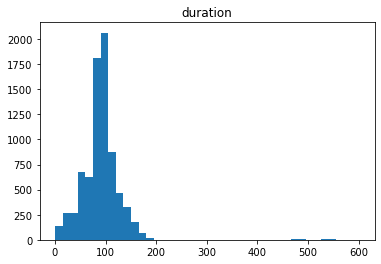

In [60]:
df2.hist(['duration'], bins=40, grid=False)

In [75]:
# Grouping according to year
df2.sort_values(by='duration', ascending=False, inplace=True)

df2.head(len(df))

,show_id,type,title,release_year,country,duration
933,s934,Movie,Soothing Surf at Del Norte for Sleep black screen,2018,NaN,601
3850,s3851,Movie,Himalayan Singing Bowls 9 hours,2017,NaN,550
4087,s4088,Movie,Thunderstorm for sleep black screen,2017,NaN,541
5214,s5215,Movie,Black Screen Ocean Waves for Sleep 9 hours,2017,NaN,541
1673,s1674,Movie,Midnight Thunderstorm for Sleep 9 Hours,2014,NaN,541
...,...,...,...,...,...,...
5701,s5702,Movie,PrimeVideoQATestMovie16 US,2015,NaN,0
5162,s5163,Movie,Asin_tombstone_test_target_04,2019,NaN,0
1381,s1382,Movie,Paradise Canyon - Digitally Remastered,1935,NaN,0
5191,s5192,Movie,Asintombstonetest-target,2019,NaN,0


In [ ]:
df2.groupby(by='duration')

In [85]:
df2.groupby(['release_year'])['duration'].value_counts()

release_year  duration
1920          78          2
              60          1
1922          121         1
              145         1
1923          113         1
                         ..
2021          154         1
              156         1
              157         1
              158         1
              188         1
Name: duration, Length: 3150, dtype: int64

In [93]:
df2['Faixas'] =''

df2['Faixas'][(df2['duration']<40)] = 'short',
df2['Faixas'][(df2['duration']>=40)&(df2['duration']<180)] = 'feature_length',
df2['Faixas'][(df2['duration']>=180)] = 'too_long'

C:\Users\rafas\AppData\Local\Temp\ipykernel_10924\577853799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Faixas'][(df2['duration']<40)] = 'short',
C:\Users\rafas\AppData\Local\Temp\ipykernel_10924\577853799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Faixas'][(df2['duration']>=40)&(df2['duration']<180)] = 'feature_length',
C:\Users\rafas\AppData\Local\Temp\ipykernel_10924\577853799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [94]:
df2

,show_id,type,title,release_year,country,duration,Faixas
933,s934,Movie,Soothing Surf at Del Norte for Sleep black screen,2018,NaN,601,too_long
3850,s3851,Movie,Himalayan Singing Bowls 9 hours,2017,NaN,550,too_long
4087,s4088,Movie,Thunderstorm for sleep black screen,2017,NaN,541,too_long
5214,s5215,Movie,Black Screen Ocean Waves for Sleep 9 hours,2017,NaN,541,too_long
1673,s1674,Movie,Midnight Thunderstorm for Sleep 9 Hours,2014,NaN,541,too_long
...,...,...,...,...,...,...,...
5701,s5702,Movie,PrimeVideoQATestMovie16 US,2015,NaN,0,short
5162,s5163,Movie,Asin_tombstone_test_target_04,2019,NaN,0,short
1381,s1382,Movie,Paradise Canyon - Digitally Remastered,1935,NaN,0,short
5191,s5192,Movie,Asintombstonetest-target,2019,NaN,0,short
